# Facebook EDA

**By Gaurav Padawe - 6th September, 2018**

In this project I'm performing EDA on Pseudo Facebook Dataset.

Dataset contains 99003 rows and 15 Features.

Questions Arising after looking at Dataset. Few of them are as follows:

- What is the Frequency of Male and Female ?
- What age group we frequently see in the Dataset ?
- What's the frequency of under 18 teenage ?
- what can we conclude from Mobile vs Desktop likes ?

Plus many questions arised while performing Analysis. Let us dive right into it and do some basic analysis and visualisations.

- Setting Path

In [1]:
path = "D:/Data Science/DS Prac/EDA/Project Datasets/Facebook_data/Project_5_Facebook data/"

- Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

- Reading table

In [28]:
fb = pd.read_table(path+"pseudo_facebook.tsv", sep="\s")
fb.head()

C:\Users\Gaurav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


userid  age  dob_day  dob_year  dob_month  gender  tenure  friend_count  \
0  2094382   14       19      1999         11    male   266.0             0   
1  1192601   14        2      1999         11  female     6.0             0   
2  2083884   14       16      1999         11    male    13.0             0   
3  1203168   14       25      1999         12  female    93.0             0   
4  1733186   14        4      1999         12    male    82.0             0   

   friendships_initiated  likes  likes_received  mobile_likes  \
0                      0      0               0             0   
1                      0      0               0             0   
2                      0      0               0             0   
3                      0      0               0             0   
4                      0      0               0             0   

   mobile_likes_received  www_likes  www_likes_received  
0                      0          0                   0  
1                      0          0                   0  
2                      0          0                   0  
3                      0          0                   0  
4                      0          0                   0

- Checking for columns with Missing values

In [4]:
fb.isnull().any()

userid                   False
age                      False
dob_day                  False
dob_year                 False
dob_month                False
gender                    True
tenure                    True
friend_count             False
friendships_initiated    False
likes                    False
likes_received           False
mobile_likes             False
mobile_likes_received    False
www_likes                False
www_likes_received       False
dtype: bool

- Filling Missing Values by some methods

In [5]:
fb['gender'] = fb['gender'].fillna(method="bfill")
fb['tenure'] = fb['tenure'].fillna(fb['tenure'].mean())

- Getting Descriptive Stats of the Data

In [6]:
fb.describe().round()

userid      age  dob_day  dob_year  dob_month   tenure  \
count    99003.0  99003.0  99003.0   99003.0    99003.0  99003.0   
mean   1597045.0     37.0     15.0    1976.0        6.0    538.0   
std     344059.0     23.0      9.0      23.0        4.0    458.0   
min    1000008.0     13.0      1.0    1900.0        1.0      0.0   
25%    1298806.0     20.0      7.0    1963.0        3.0    226.0   
50%    1596148.0     28.0     14.0    1985.0        6.0    412.0   
75%    1895744.0     50.0     22.0    1993.0        9.0    675.0   
max    2193542.0    113.0     31.0    2000.0       12.0   3139.0   

       friend_count  friendships_initiated    likes  likes_received  \
count       99003.0                99003.0  99003.0         99003.0   
mean          196.0                  107.0    156.0           143.0   
std           387.0                  189.0    572.0          1388.0   
min             0.0                    0.0      0.0             0.0   
25%            31.0                   17.0      1.0             1.0   
50%            82.0                   46.0     11.0             8.0   
75%           206.0                  117.0     81.0            59.0   
max          4923.0                 4144.0  25111.0        261197.0   

       mobile_likes  mobile_likes_received  www_likes  www_likes_received  
count       99003.0                99003.0    99003.0             99003.0  
mean          106.0                   84.0       50.0                59.0  
std           445.0                  840.0      286.0               601.0  
min             0.0                    0.0        0.0                 0.0  
25%             0.0                    0.0        0.0                 0.0  
50%             4.0                    4.0        0.0                 2.0  
75%            46.0                   33.0        7.0                20.0  
max         25111.0               138561.0    14865.0            129953.0

- What is the Frequency of Male and Female in the Dataset ?

Ans: It's clear that Male's are more than Female 

Text(0.5,1,'Male VS Female')

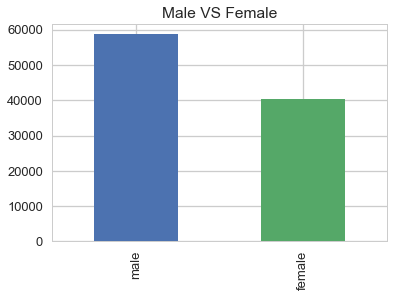

In [7]:
sns.set(style="whitegrid")
sns.set_context("talk")
fb['gender'].value_counts().plot(kind="bar")
plt.title("Male VS Female")

- How can we find out which age bulk is mostly likely using Facebook ?

Ans: By the observation we can say that Male's between 20 to 45 age are more frequently using the Service. While for female's we see that 20 to 55 year old are more likely seen in Dataset ?

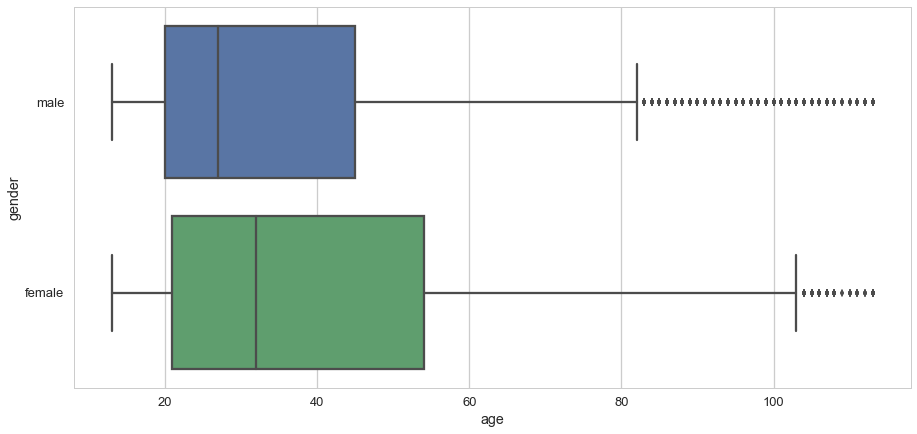

In [8]:
plt.figure(figsize=(15,7))
sns.boxplot(x="age", y="gender", data=fb)

- But what overall dataset has to say about age ?

Ans. We see users of 20 to 50 year old are more in the dataset.

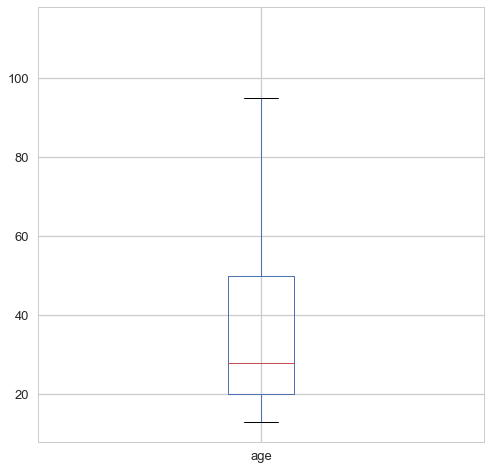

In [9]:
plt.figure(figsize=(8,8))
pd.DataFrame(fb['age']).boxplot()

- Any specific age we get to see frequently ?

Ans: Yes, 18 years old are more in our Dataset, which means we've lots of 18 year old using this service followed by 23 year old and 19 and so on.

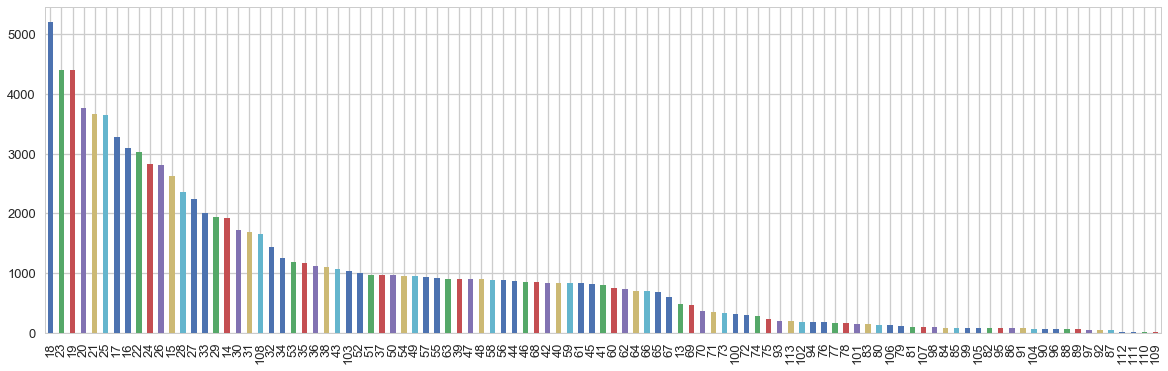

In [10]:
age = fb['age'].value_counts()
age.plot(kind="bar", figsize=(20,6))

- Let us Target how many users do we get to see under 18. 

17    3283
16    3086
15    2618
14    1925
13     484
Name: age, dtype: int64


([<matplotlib.patches.Wedge at 0x1bbad2a8c50>,
 [Text(0.679419,0.865096,'17 year'),
  Text(-0.975299,0.508715,'16 year'),
  Text(-0.507101,-0.976139,'15 year'),
  Text(0.768326,-0.787195,'14 year'),
  Text(1.09022,-0.146334,'13 year')],
 [Text(0.370592,0.47187,'28.8%'),
  Text(-0.531981,0.277481,'27.1%'),
  Text(-0.276601,-0.53244,'23.0%'),
  Text(0.419087,-0.429379,'16.9%'),
  Text(0.594667,-0.0798186,'4.2%')])

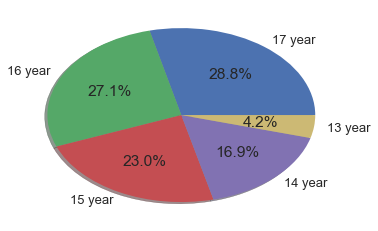

In [11]:
under_18 = fb[fb['age']<18]
under_18_plot = under_18['age'].value_counts()
print (under_18_plot)
label = '17 year','16 year','15 year','14 year','13 year'
plt.pie(pd.DataFrame(under_18_plot), shadow=True, labels=label, autopct='%1.1f%%')

- Let's see which Feautures are Strongly Correlated

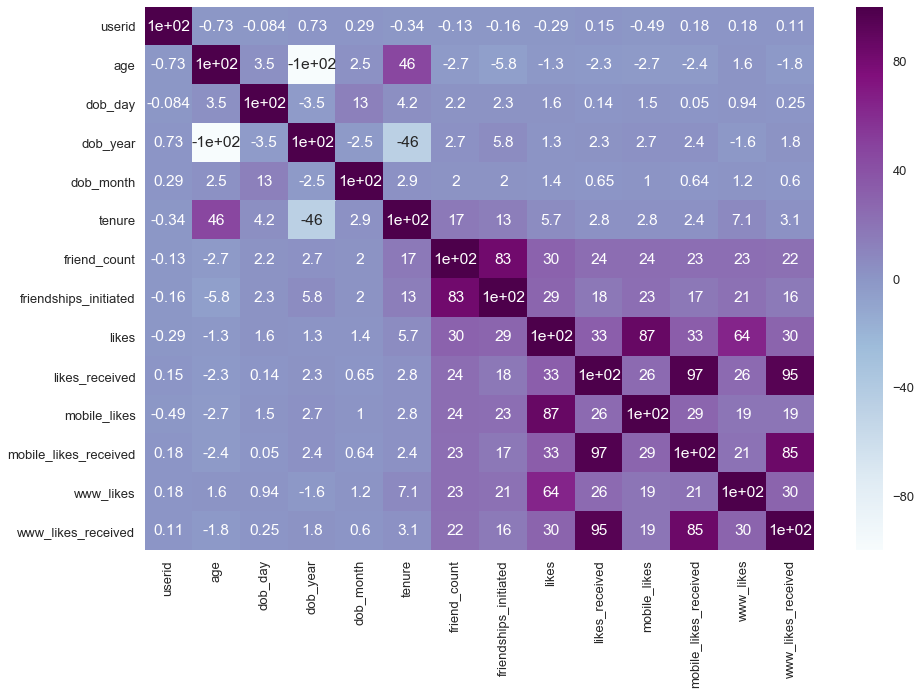

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(fb.corr()*100, annot=True, cmap="BuPu")

- Average time spent on facebook by a particular Age user over the course of time.

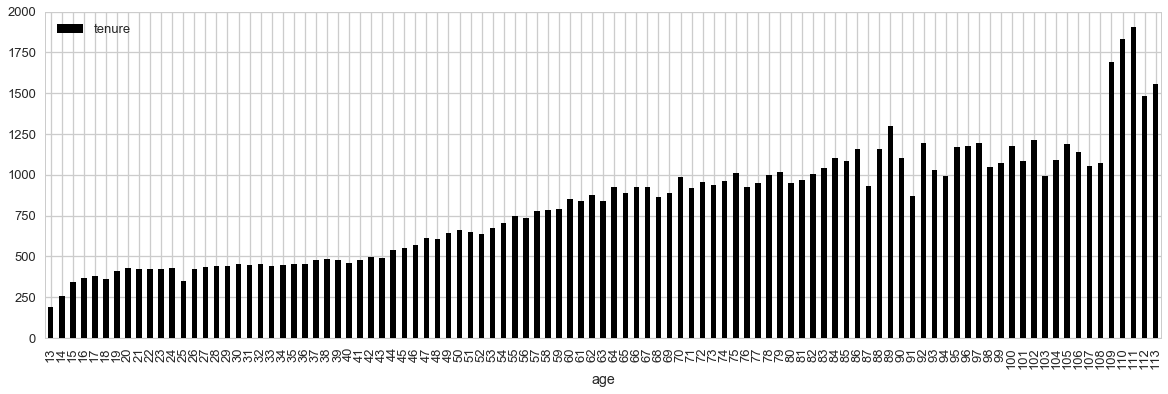

In [13]:
avg_tenure = pd.pivot_table(fb, index=['age'], values=['tenure'], aggfunc="mean")
avg_tenure.plot(kind="bar", figsize=(20,6), colormap="copper")

- Targeting Male and Female under 30 to get overview of Average Tenure , What do we see ?

Ans: We see something unexpected, 25 year old Male and Female had spent less time using the service. There might be some reason behind it.

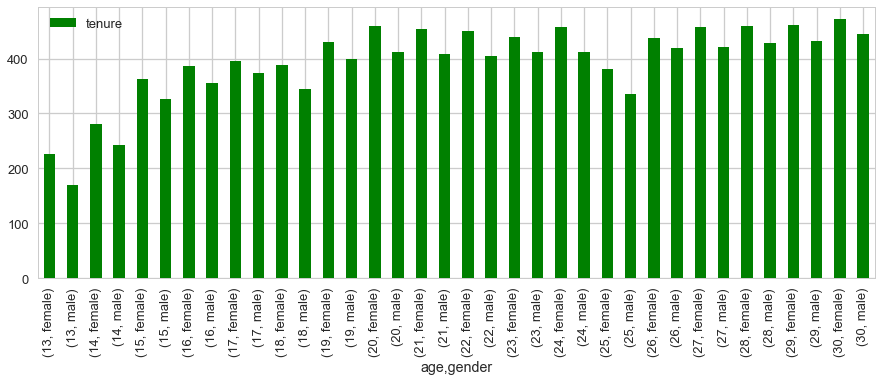

In [14]:
age_1 = fb[fb['age'] <= 30]
gender_tenure_1 = pd.pivot_table(age_1, index=['age','gender'], values=['tenure'], aggfunc="mean")
gender_tenure_1.plot(kind="bar", figsize=(15,5), color="g")

- Below we see that almost 4000 people had regsitered on facebook with birthdate of 1/1, What is leading them to do it ? 

Ans: Could be a demo account, Fake account or user might be concerned about his/her privacy.

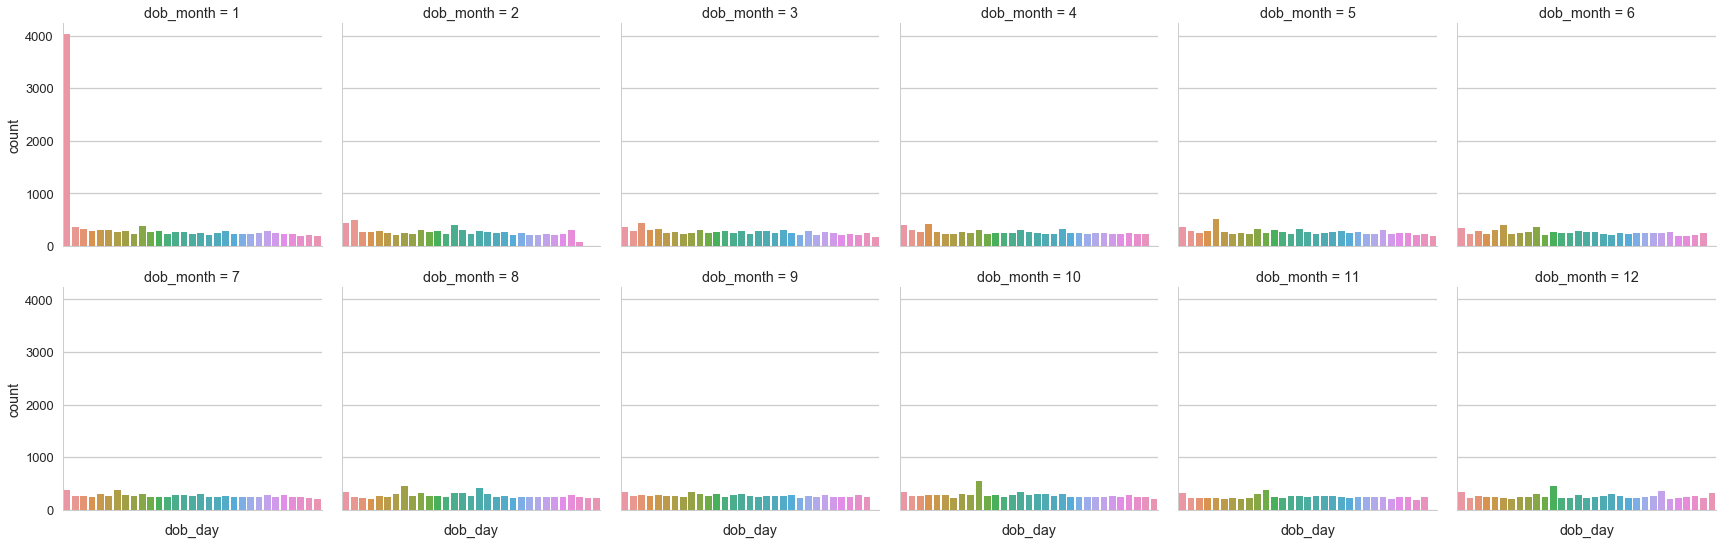

In [15]:
sns.factorplot("dob_day", col="dob_month", col_wrap=6, data=fb, kind='count', size=4, aspect=1).set(xticklabels=[])

- We see quite a strong positive correlation between Friend Count and Friendship initiated 

Text(0,0.5,'Friendships Initiated')

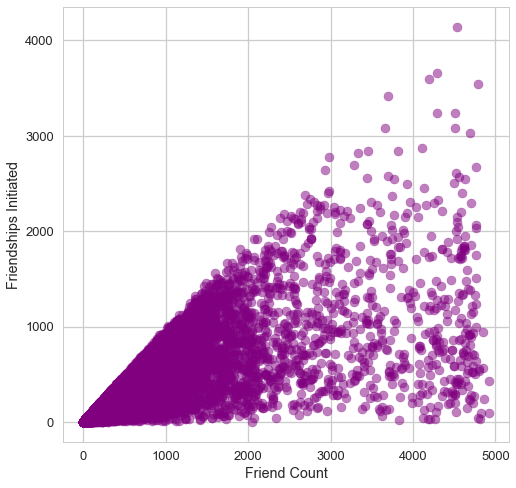

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(fb['friend_count'], fb['friendships_initiated'], alpha=0.5, color="purple")
plt.xlabel("Friend Count")
plt.ylabel("Friendships Initiated")

- Lets get the view of how "friend_count" and "friendships_initiated" is Distributed.

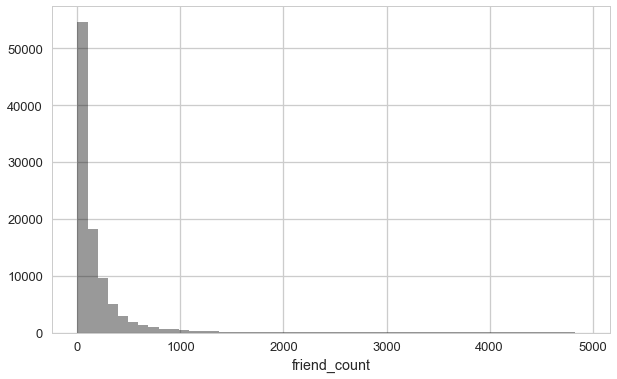

In [17]:
plt.figure(figsize=(10,6))
sns.distplot(fb['friend_count'], kde=False, color="black")

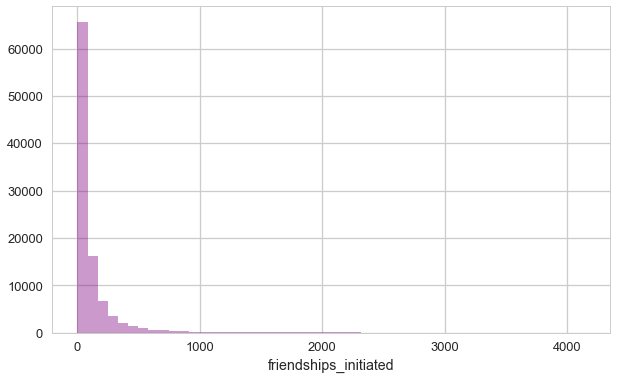

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(fb['friendships_initiated'], kde=False, color="purple")

- How "friend_count" and "friendship_initiation" affects Age wise ?

Ans: Below we see younger users between 10 to 35 years old are likely having large number of Friend count and Friendship initiation, later it's almost flat/constant but we see a spike at 65 , 90's and 100's which is quite Interesting.

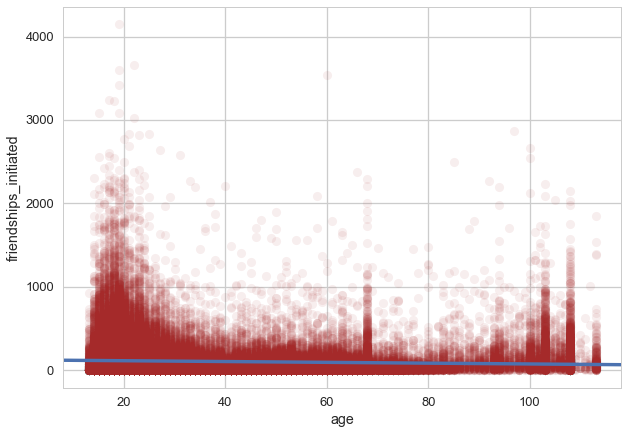

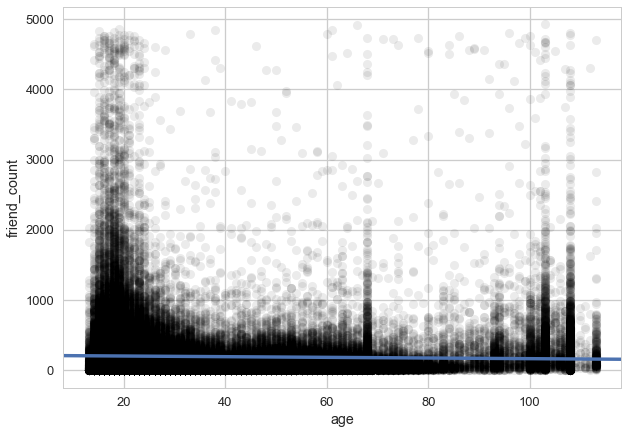

In [19]:
plt.figure(figsize=(10,7))
sns.regplot(x="age", y="friendships_initiated", fit_reg=True, data=fb, scatter_kws={"alpha":0.08, "color":"brown"})
plt.show()
plt.figure(figsize=(10,7))
sns.regplot(x="age", y="friend_count", fit_reg=True, data=fb, scatter_kws={"alpha":0.08, "color":"black"})
plt.show()

- What's the trend in "likes" and "likes_received" based on Gender ?

Ans: Even though dataset has more Male counts and Less Female counts, Female's average likes/likes_recieved ratio is 270:250 while Male's is lowered to 80:60

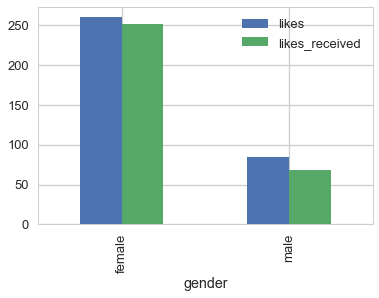

In [20]:
likes = pd.pivot_table(fb, index=['gender'], values=['likes','likes_received'], aggfunc="mean")
likes.plot(kind="bar")

- How mobile service and desktop service is performing for every age group ?

Ans: One way to calculate this is to observe likes ratio of mobile and desktop (www) , It is obvious that mobile service is being used more over desktop but we see quite fluctuations in mobile service usage for people between 60 to 80. Also, a great spike in mobile usage can be observed for 90 years old people.

Text(0.5,1,'')

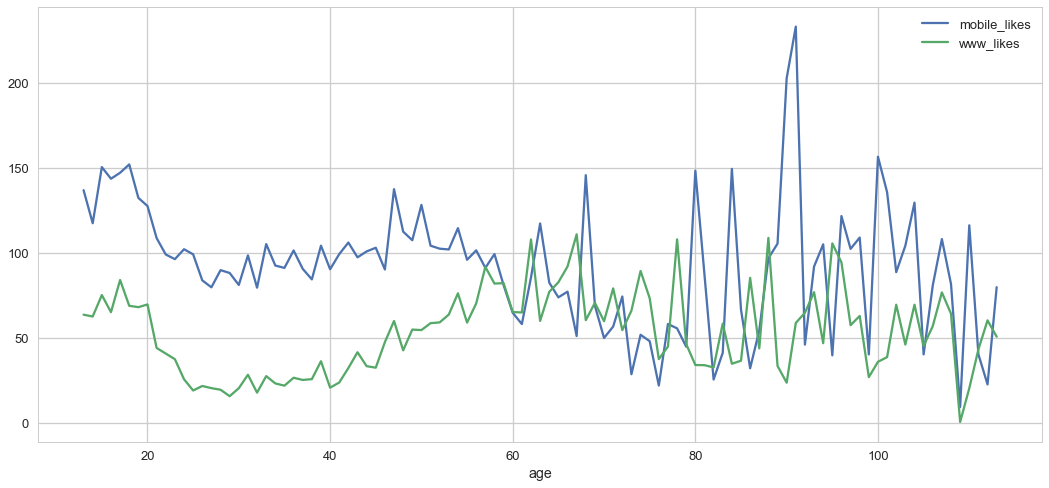

In [23]:
compare_likes_med = pd.pivot_table(fb, index=['age'], values=['mobile_likes','www_likes'], aggfunc="mean")
compare_likes_med.plot(figsize=(18,8))
plt.title('')

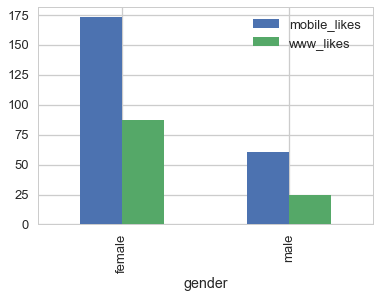

In [24]:
total_comparision_likes = pd.pivot_table(fb, index=['gender'], values=['mobile_likes','www_likes'], aggfunc="mean")
total_comparision_likes.plot(kind="bar")

- Same situation can be observed here for "likes_received", mobile and desktop usage seems clashing , a little bit dip in mobile usage can be observed for people between 60 and 80 years old.

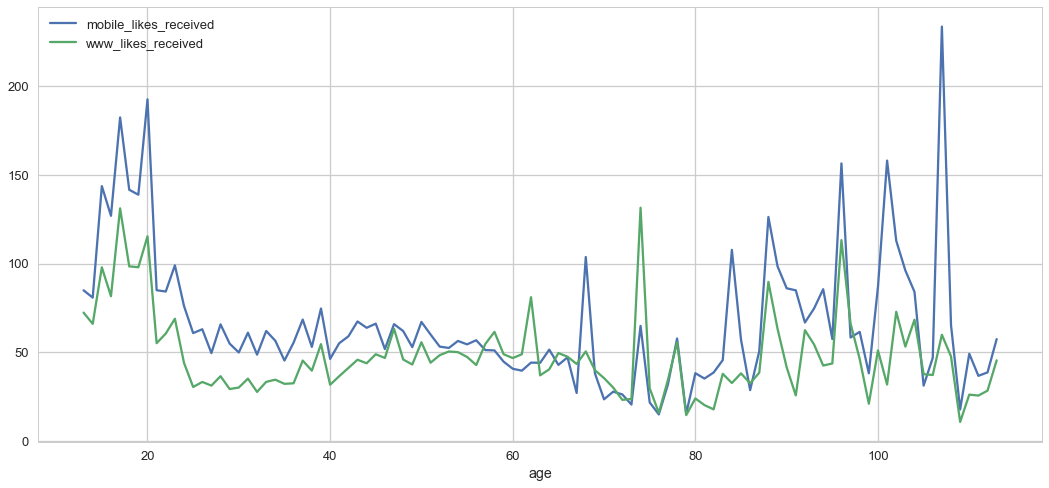

In [25]:
compare_likes_received = pd.pivot_table(fb, index=['age'], values=['mobile_likes_received','www_likes_received'], aggfunc="mean")
compare_likes_received.plot(figsize=(18,8))

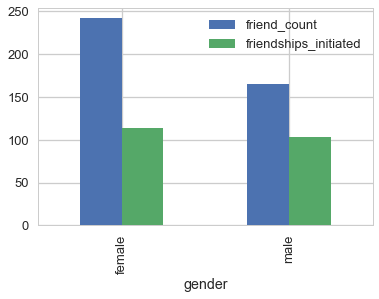

In [26]:
frnd_count_init = pd.pivot_table(fb, index=['gender'], values=['friend_count','friendships_initiated'], aggfunc="mean")
frnd_count_init.plot(kind="bar")

Inference:
    
- Found how lots of people are using 1/1 birthdate maybe to protect their privacy, Further in depth AI based analysis of those accounts like analysing the tenure, if the user is active / inactive from long period of time , reported content (if any), amount of posts initiated and the time it was initiated, etc can be used to figure out if the account is demo or Fake and various steps could be taken like deactivation of account, permanent termination prior to the notice sent to the user on his/her email so as to maintain facebook's policy standards.
- Observed how people of 60-70 age groups are still somewhat relied on Desktop service.
- Observed Likes/Likes received ratio for Male and Female.
- Found teenagers of 13 year old using facebook service